<a href="https://colab.research.google.com/github/PersGraphics/redes_neuronales_zalando/blob/main/redes_neuronales_Zalando.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# https://www.kaggle.com/datasets/zalando-research/fashionmnist
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import numpy as np

In [17]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

In [18]:
train_images.shape

(60000, 28, 28)

In [19]:
test_images.shape

(10000, 28, 28)

In [20]:
display(np.unique(train_labels))
display(np.unique(test_labels))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

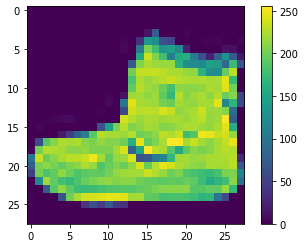

In [21]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [22]:
train_images = train_images / 255.0
test_images = test_images / 255.0

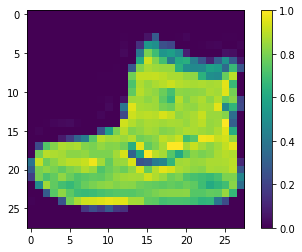

In [23]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

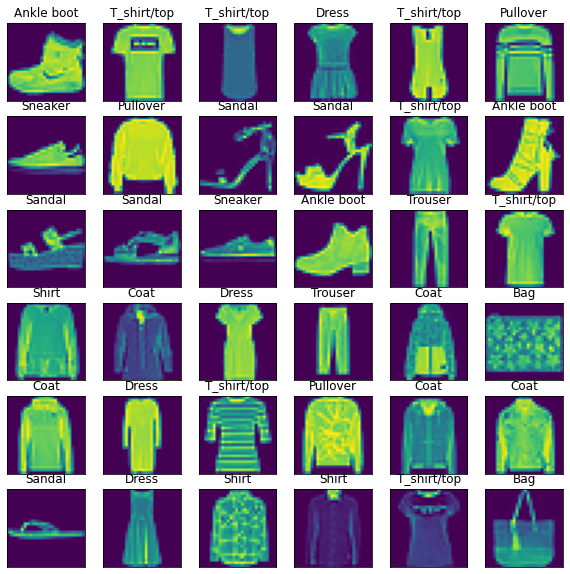

In [24]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape((28,28)))
    label_index = int(train_labels[i])
    plt.title(class_names[label_index])
plt.show()

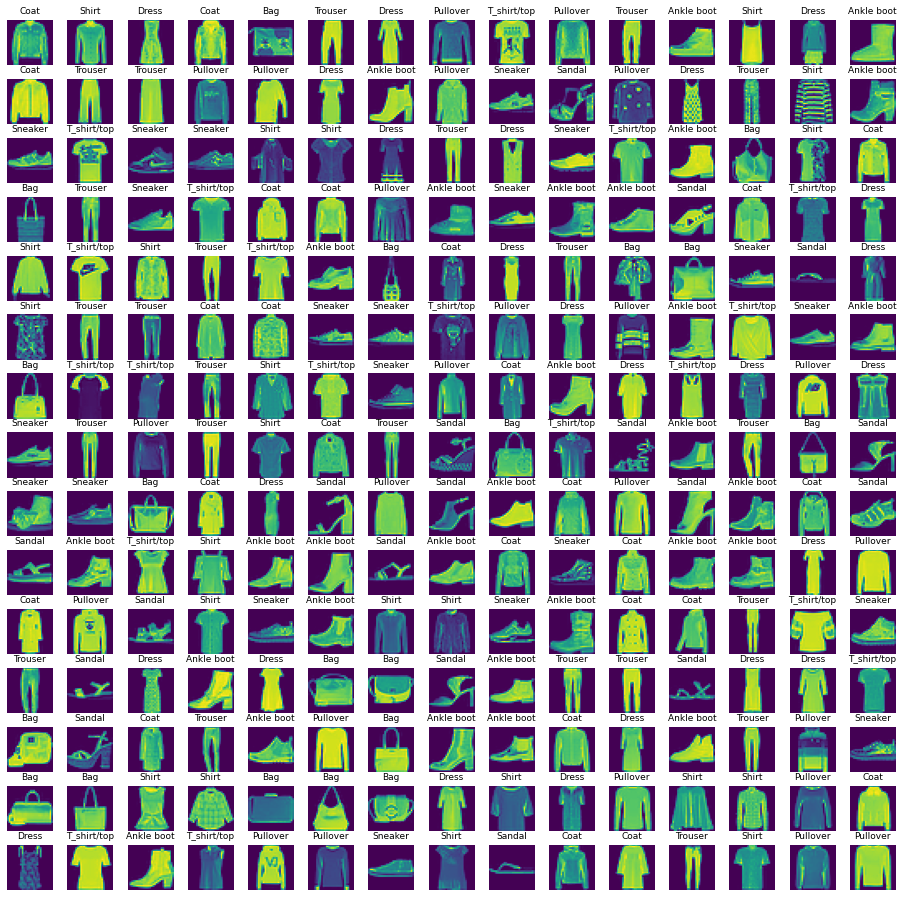

In [25]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (16,16))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array
n_train = len(train_images) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow( train_images[index].reshape((28,28)) )
    labelindex = int(train_labels[index])
    axes[i].set_title(class_names[labelindex], fontsize = 9)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.3)

# IMPLEMENTACIÓN DE RED NEURONAL

In [26]:
import tensorflow as tf
from tensorflow import keras

(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

# Normalizar los datos
train_images = train_images / 255.0
test_images = test_images / 255.0

# Definir el modelo
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(train_images.reshape(-1,28,28,1), train_labels, epochs=10, validation_data=(test_images.reshape(-1,28,28,1), test_labels))


Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.5019 - accuracy: 0.8237 - val_loss: 0.4196 - val_accuracy: 0.8504
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3753 - accuracy: 0.8647 - val_loss: 0.3930 - val_accuracy: 0.8619
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3370 - accuracy: 0.8762 - val_loss: 0.3881 - val_accuracy: 0.8606
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3120 - accuracy: 0.8848 - val_loss: 0.3587 - val_accuracy: 0.8716
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2945 - accuracy: 0.8921 - val_loss: 0.3510 - val_accuracy: 0.8727
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2797 - accuracy: 0.8962 - val_loss: 0.3419 - val_accuracy: 0.8773
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2677 - accuracy: 0.9012 - val_loss: 0.3259 - val_accu

In [27]:
loss, accuracy = model.evaluate(test_images.reshape(-1,28,28,1), test_labels)
print('Test accuracy: %.2f' % (accuracy * 100))

313/313 [==============================] - 1s 2ms/step - loss: 0.3308 - accuracy: 0.8835
Test accuracy: 88.35


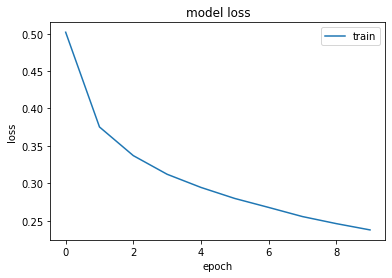

In [28]:
plt.plot(history.history["loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train"], loc="upper right")
plt.show()

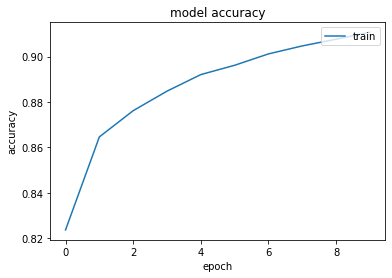

In [29]:
plt.plot(history.history["accuracy"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train"], loc="upper right")
plt.show()